In [10]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()
import datetime
import re

In [11]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
macro = pd.read_csv('data/macro.csv')

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21570 entries, 0 to 21569
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 48.1+ MB


## Feature 분석
* 292 features in total, 100 features in macro 
* feature 들의 상관관계, 내용, Description 등의 자료정리 필요
* 추후 업데이트 예정

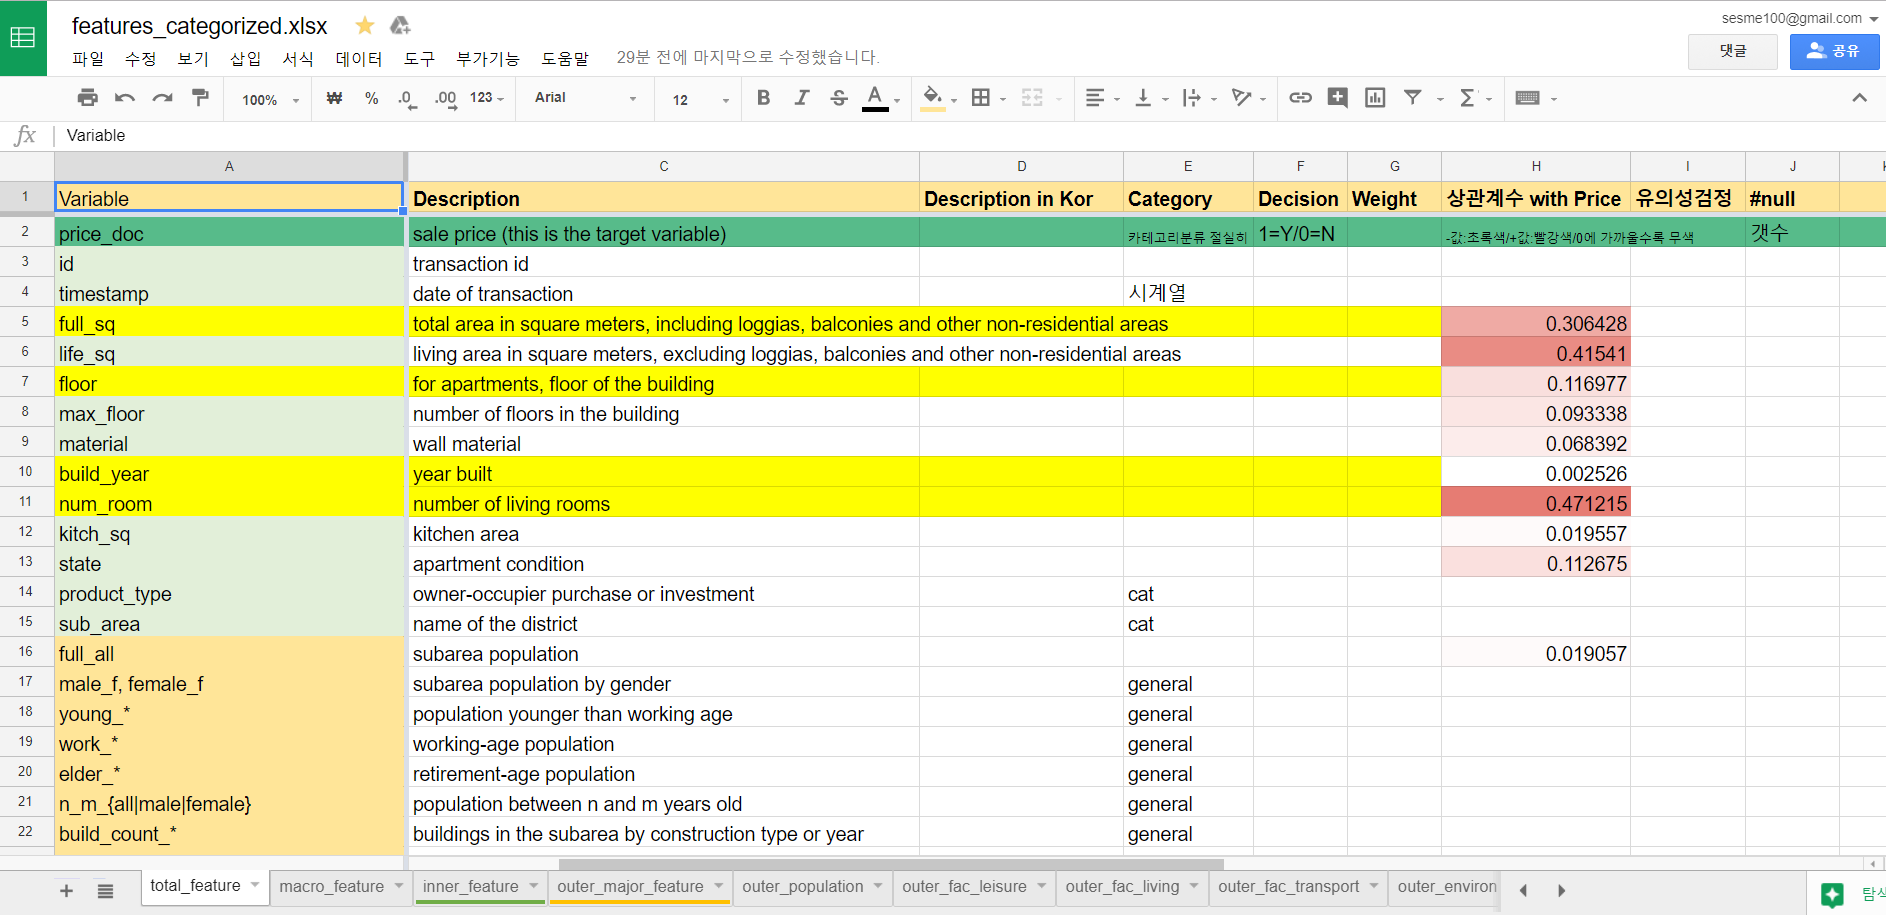

## Total Feature 와 price_doc 의 상관계수 찾기 

* Category 값은 상관계수로 설명할 수 없으나 category 값들중에 등위수 calssification 이 가능한 feature 있음

* Null 값이 포함되어 있으므로 Data Imputation 후 Selection 필요 


In [4]:
## total feature 와 price_doc 의 상관계수 찾기 
## total feature
features = list(train.columns.values)
len(list(train.columns.values))

292

In [5]:
#dataframe = pd.concat([train.price_doc,train[features]],axis = 1)
dataframe = train[features]## Null 값 포함 
dataframe

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
1,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
2,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
3,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,81,16,3,38,80,1,27,127,8,5500000
4,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,11,18,1,0,47,4,2000000
5,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,19,8,1,18,34,1,3,85,11,5300000
6,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,19,13,0,10,20,1,3,67,1,2000000
7,11,2011-09-16,36,19.0,12.0,NaN,NaN,NaN,NaN,NaN,...,1,1,0,5,9,0,2,17,6,4650000
8,12,2011-09-16,38,19.0,11.0,NaN,NaN,NaN,NaN,NaN,...,8,3,0,10,9,0,0,35,4,4800000
9,13,2011-09-17,43,28.0,4.0,NaN,NaN,NaN,NaN,NaN,...,13,9,1,7,15,0,2,47,0,5100000


In [6]:
corrmat = dataframe.corr()
corrmat.price_doc

id                                       0.119940
full_sq                                  0.306428
life_sq                                  0.415410
floor                                    0.116977
max_floor                                0.093338
material                                 0.068392
build_year                               0.002526
num_room                                 0.471215
kitch_sq                                 0.019557
state                                    0.112675
area_m                                  -0.164714
raion_popul                              0.150415
green_zone_part                         -0.092247
indust_part                             -0.079475
children_preschool                       0.132387
preschool_quota                         -0.076307
preschool_education_centers_raion        0.155205
children_school                          0.137450
school_quota                            -0.016606
school_education_centers_raion           0.192935


In [7]:
Weird_features = ['culture_objects_top_25','thermal_power_plant_raion','incineration_raion','oil_chemistry_raion','radiation_raion',\
            'railroad_terminal_raion','big_market_raion','nuclear_reactor_raion','detention_facility_raion','big_road1_1line',\
            'railroad_1line','ecology','price_doc']

## corr() 값이 나오지 않음 = category or boolean 값 

In [8]:
dataframe = train[Weird_features]## Null 값 포함 
cor = dataframe.corr()
cor.price_doc

price_doc    1.0
Name: price_doc, dtype: float64

## Inner Features 와 Price_doc 의 상관계수 구하기

In [9]:
# Inner features 분류

inner_feature_colnames = ['price_doc', 'id', 'timestamp', 'full_sq', 'life_sq','floor',\
                          'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',\
                         'state', 'product_type', 'sub_area']

inner_feature_colnames_num = ['full_sq', 'life_sq', 'floor', 'max_floor',\
                             'num_room', 'kitch_sq']

inner_feature_df = train[inner_feature_colnames]


In [10]:
## 각 inner feature과 price_doc 상관계수 구하기 
## inner_feature_colnames
## inner_feature_colnames_num 은 이미 ## inner_feature_colnames 에 포함이 되어있으므로 중복
df_for_inner_pop = pd.concat([train.price_doc, train[inner_feature_colnames]], axis=1)
corrmat = df_for_inner_pop.corr()
print(len(corrmat.price_doc))
corrmat.price_doc

12


,price_doc,price_doc
price_doc,1.000000,1.000000
price_doc,1.000000,1.000000
id,0.119940,0.119940
full_sq,0.306428,0.306428
life_sq,0.415410,0.415410
floor,0.116977,0.116977
max_floor,0.093338,0.093338
material,0.068392,0.068392
build_year,0.002526,0.002526
num_room,0.471215,0.471215


In [11]:
train[inner_feature_colnames]
corrmat = train[inner_feature_colnames].corr()
corrmat.price_doc

price_doc     1.000000
id            0.119940
full_sq       0.306428
life_sq       0.415410
floor         0.116977
max_floor     0.093338
material      0.068392
build_year    0.002526
num_room      0.471215
kitch_sq      0.019557
state         0.112675
Name: price_doc, dtype: float64

## Outer Features 와  price_doc 상관계수 구하기 

In [12]:
## 사전 자료 1

def get_nulls_and_ftype(df):
    """
    Extract some information for early analysis
    1. num of nulls - integer
    2. feature type - 'num' for numerical/ 'cat' for categorical
    
    input: pandas DataFrame for one column
    output: tuple e.g., (3, 'num') 
    """
    
    # initialize the output container
    num_null, f_type = 0, ''
    col_name = df.columns.values[0].lower()
    #print(col_name)
    
    # count null values
    if df.isnull().values.any():
        #print(df.isnull().values)
        num_null = df.isnull().values.sum()
        #print('num_null', num_null)
    
    
    # identify feature type
    if re.search(r'id|state|year|time|material', col_name)\
            or df.dtypes.values == 'object':
        f_type = 'cat'
    
    else:
        f_type = 'num'
            
    return (num_null, f_type)
        
    

In [13]:
## 사전자료2

outer_feature_key_pop = r'full_all|_all|male|female|children|elder|^(area_m)|popul'
outer_feature_key_leisure = r'^(park)|culture|church|mosque|theater|museum|exhibition|catering|cafe|^(sport)|leisure'
outer_feature_key_living = r'(hospital)|(healthcare)|(shopping)|(market)|(fitness)|(swim)|^(ice)|(stadium)|(basketball)|(hospice)|(trc)|(preschool_)|(school_)|(additional)|(university)|(kindergarten_km)|(school_km)'
outer_feature_key_transport = r'metro|railroad|terminal|station|mkad|ttk|sadovoe|bulvar|kremlin|road1|road2|vokzaly|^(workplaces)'
outer_feature_key_env = r'water|build|ecology|green|prom|office|indust|plant|chemistry|radiation|nuclear|power|cemetery|(detention)|incineration|^(ts)'


def feature_filter_by_key(key):
    return [col for col in train.columns.values\
           if re.search(key, col)]

outer_feature_pop = feature_filter_by_key(outer_feature_key_pop)
outer_feature_leisure = feature_filter_by_key(outer_feature_key_leisure)
outer_feature_living = feature_filter_by_key(outer_feature_key_living)
outer_feature_transport = feature_filter_by_key(outer_feature_key_transport)
outer_feature_env = feature_filter_by_key(outer_feature_key_env)

In [14]:
# 사전자료

def split_by_numcat(origin_list, base_df):
    '''Specification
    Split the original feature name list by its feature type
    input: 
        1. original list to split out
        2. base DataFrame (train or test set)
    output: filtered 2 lists
    '''
    origin_feature_num = []
    
    for org in origin_list:
        
        origin_df = base_df[[org]]
        
        if get_nulls_and_ftype(origin_df)[1] == 'num':
            origin_feature_num.append(org)
                        
    origin_feature_cat = [fname for fname in origin_list\
                        if fname not in origin_feature_num]
    
    # Check if there is exception
    
    try:
        if len(origin_list) == len(origin_feature_num) + len(origin_feature_cat):
            return origin_feature_num, origin_feature_cat
        
    except:
        raise ExceptionError


## outer feature 정리
outer_feature_pop_num, outer_feature_pop_cat = split_by_numcat(outer_feature_pop, train)
outer_feature_living_num, outer_feature_living_cat = split_by_numcat(outer_feature_living, train)
outer_feature_transport_num, outer_feature_transport_cat = split_by_numcat(outer_feature_transport, train)
outer_feature_env_num, outer_feature_env_cat = split_by_numcat(outer_feature_env, train)



In [15]:
## 각 outer feature과 price_doc 상관계수 구하기 
## outer_feature_pop_num
df_for_outer_pop = pd.concat([train.price_doc, train[outer_feature_pop_num]], axis=1)
corrmat = df_for_outer_pop.corr()
corrmat.iloc[[0]].values[:,1:]
print(len(corrmat.price_doc))
corrmat.price_doc

32


price_doc             1.000000
area_m               -0.164714
raion_popul           0.150415
children_preschool    0.132387
children_school       0.137450
full_all              0.019057
male_f                0.020187
female_f              0.018097
young_all             0.135328
young_male            0.133787
young_female          0.136688
work_all              0.141505
work_male             0.143633
work_female           0.138605
ekder_all             0.173007
ekder_male            0.181655
ekder_female          0.168337
0_6_all               0.132387
0_6_male              0.131086
0_6_female            0.133524
7_14_all              0.137450
7_14_male             0.135902
7_14_female           0.138604
0_17_all              0.137405
0_17_male             0.136102
0_17_female           0.138522
16_29_all             0.016232
16_29_male            0.017016
16_29_female          0.015479
0_13_all              0.135619
0_13_male             0.134091
0_13_female           0.136947
Name: pr

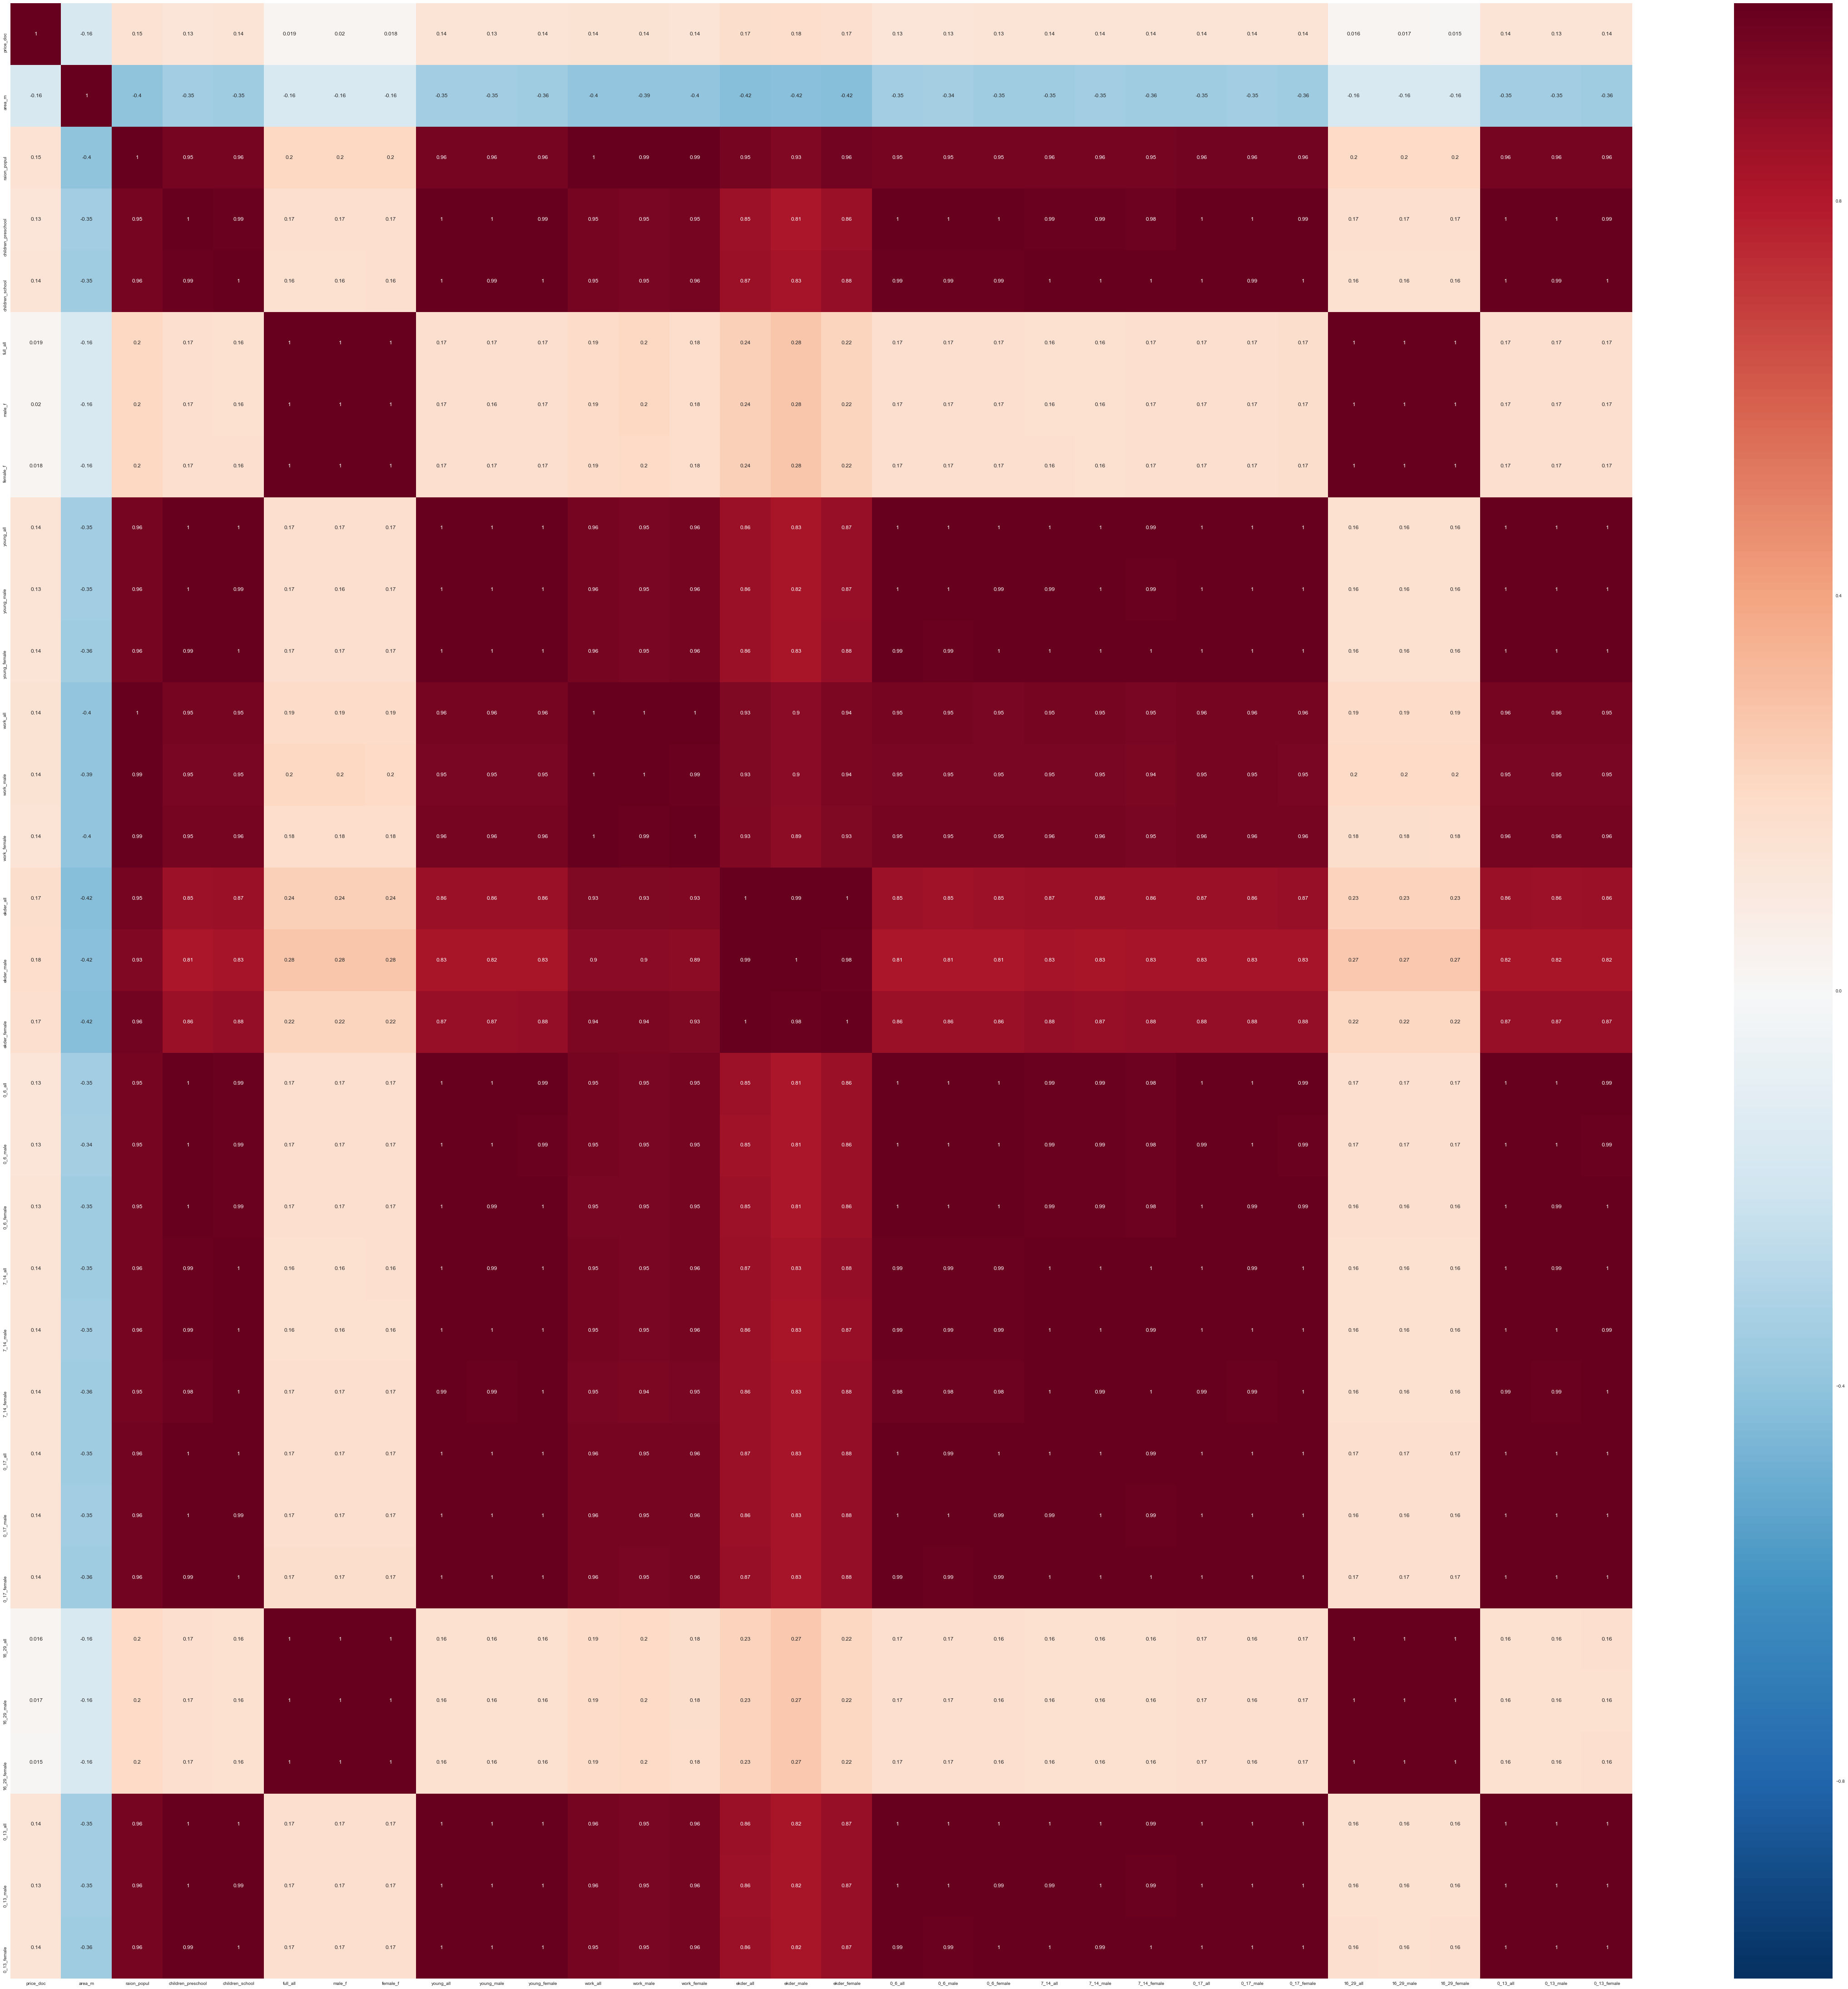

In [16]:
f, ax = plt.subplots(figsize=(80, 80))
sns.heatmap(corrmat, annot=True)
plt.show() ## 시각화 

In [17]:
## 각 outer feature과 price_doc 상관계수 구하기 
## outer_feature_pop_cat
df_for_outer_pop = pd.concat([train.price_doc, train[outer_feature_pop_cat]], axis=1)
corrmat = df_for_outer_pop.corr()
print(len(corrmat.price_doc))
corrmat.price_doc
## price_doc 1개 

1


price_doc    1.0
Name: price_doc, dtype: float64

In [18]:
## 각 outer feature과 price_doc 상관계수 구하기 
## outer_feature_living_num
df_for_outer_pop = pd.concat([train.price_doc, train[outer_feature_living_num]], axis=1)
corrmat = df_for_outer_pop.corr()
print(len(corrmat.price_doc))
corrmat.price_doc


44


price_doc                                1.000000
preschool_quota                         -0.076307
preschool_education_centers_raion        0.155205
school_quota                            -0.016606
school_education_centers_raion           0.192935
school_education_centers_top_20_raion    0.110361
hospital_beds_raion                      0.163875
healthcare_centers_raion                 0.192973
university_top_20_raion                  0.169063
additional_education_raion               0.056659
shopping_centers_raion                   0.149693
kindergarten_km                         -0.134975
school_km                               -0.144974
big_market_km                           -0.051861
market_shop_km                          -0.174258
fitness_km                              -0.186360
swim_pool_km                            -0.210019
ice_rink_km                             -0.151940
stadium_km                              -0.237086
basketball_km                           -0.223170


In [19]:
## 각 outer feature과 price_doc 상관계수 구하기 
## outer_feature_living_cat
df_for_outer_pop = pd.concat([train.price_doc, train[outer_feature_living_cat]], axis=1)
corrmat = df_for_outer_pop.corr()
print(len(corrmat.price_doc))
corrmat.price_doc
## price_doc 1 개 

1


price_doc    1.0
Name: price_doc, dtype: float64

In [20]:
## 각 outer feature과 price_doc 상관계수 구하기 
## outer_feature_transport_num
df_for_outer_pop = pd.concat([train.price_doc, train[outer_feature_transport_num]], axis=1)
corrmat = df_for_outer_pop.corr()
print(len(corrmat.price_doc))
corrmat.price_doc


22


price_doc                            1.000000
metro_min_avto                      -0.191054
metro_km_avto                       -0.177329
metro_min_walk                      -0.180889
metro_km_walk                       -0.180889
railroad_station_walk_km            -0.133119
railroad_station_walk_min           -0.133119
railroad_station_avto_km            -0.130265
railroad_station_avto_min           -0.137919
public_transport_station_km         -0.118469
public_transport_station_min_walk   -0.118469
mkad_km                             -0.017457
ttk_km                              -0.273019
sadovoe_km                          -0.283791
bulvar_ring_km                      -0.279104
kremlin_km                          -0.279125
big_road1_km                        -0.109934
big_road2_km                        -0.163905
railroad_km                         -0.094899
zd_vokzaly_avto_km                  -0.283662
bus_terminal_avto_km                -0.162392
workplaces_km                     

In [21]:
## 각 outer feature과 price_doc 상관계수 구하기 
## outer_feature_transport_cat
df_for_outer_pop = pd.concat([train.price_doc, train[outer_feature_transport_cat]], axis=1)
corrmat = df_for_outer_pop.corr()
print(len(corrmat.price_doc))
corrmat.price_doc

8


price_doc                   1.000000
ID_metro                    0.053734
ID_railroad_station_walk   -0.024006
ID_railroad_station_avto   -0.050126
ID_big_road1               -0.069278
ID_big_road2               -0.076013
ID_railroad_terminal        0.082698
ID_bus_terminal            -0.049797
Name: price_doc, dtype: float64

In [22]:
## 각 outer feature과 price_doc 상관계수 구하기 
## outer_feature_env_num
df_for_outer_pop = pd.concat([train.price_doc, train[outer_feature_env_num]], axis=1)
corrmat = df_for_outer_pop.corr()
print(len(corrmat.price_doc))
corrmat.price_doc

57


price_doc                                1.000000
green_zone_part                         -0.092247
indust_part                             -0.079475
office_raion                             0.143601
build_count_block                        0.035765
build_count_wood                        -0.046782
build_count_frame                       -0.032695
build_count_brick                        0.165773
build_count_monolith                     0.119995
build_count_panel                       -0.020081
build_count_foam                         0.019130
build_count_slag                        -0.028035
build_count_mix                         -0.036279
raion_build_count_with_builddate_info    0.060529
build_count_before_1920                  0.095790
build_count_1921-1945                    0.017419
build_count_1946-1970                    0.064345
build_count_1971-1995                   -0.011596
build_count_after_1995                   0.021335
green_zone_km                           -0.060412


In [23]:
## 각 outer feature과 price_doc 상관계수 구하기 
## outer_feature_env_cat
df_for_outer_pop = pd.concat([train.price_doc, train[outer_feature_env_cat]], axis=1)
corrmat = df_for_outer_pop.corr()
print(len(corrmat.price_doc))
corrmat.price_doc

3


price_doc                               1.000000
build_year                              0.002526
raion_build_count_with_material_info    0.060579
Name: price_doc, dtype: float64

## Macro Features 와  price_doc 상관계수 구하기 

In [24]:
macro = pd.read_csv('data/macro.csv')

In [25]:
## 각 Major Macro Feature들과 price_doc 상관계수 구하기 
## Major Macro Feature
macro_features = list(macro.columns.values)
macro_features

['timestamp',
 'oil_urals',
 'gdp_quart',
 'gdp_quart_growth',
 'cpi',
 'ppi',
 'gdp_deflator',
 'balance_trade',
 'balance_trade_growth',
 'usdrub',
 'eurrub',
 'brent',
 'net_capital_export',
 'gdp_annual',
 'gdp_annual_growth',
 'average_provision_of_build_contract',
 'average_provision_of_build_contract_moscow',
 'rts',
 'micex',
 'micex_rgbi_tr',
 'micex_cbi_tr',
 'deposits_value',
 'deposits_growth',
 'deposits_rate',
 'mortgage_value',
 'mortgage_growth',
 'mortgage_rate',
 'grp',
 'grp_growth',
 'income_per_cap',
 'real_dispos_income_per_cap_growth',
 'salary',
 'salary_growth',
 'fixed_basket',
 'retail_trade_turnover',
 'retail_trade_turnover_per_cap',
 'retail_trade_turnover_growth',
 'labor_force',
 'unemployment',
 'employment',
 'invest_fixed_capital_per_cap',
 'invest_fixed_assets',
 'profitable_enterpr_share',
 'unprofitable_enterpr_share',
 'share_own_revenues',
 'overdue_wages_per_cap',
 'fin_res_per_cap',
 'marriages_per_1000_cap',
 'divorce_rate',
 'construction_val

In [26]:
## macro_features = ['child_on_acc_pre_school','modern_education_share','old_education_build_share']
## 윗 feature 들의 상관계수가 안나옴 => 숫자들이 기호와 같이 포함되거나 숫자들이 이상함

## 시계열에 따른 train 데이터와 macro 데이터 스케일링

In [13]:
macro['yearmonth'] = macro['timestamp'].apply(lambda x: x[:4]+x[5:7])

grouped_by_timestamp = macro.groupby('yearmonth')

#macro['yearmonth'] ## 2010 년1월~ 2016년 10월 ## 2483 개 데이터
## index 577 부터 201108 시작~ index 2006 = 2015년 6월 마지막
train['yearmonth'] = train['timestamp'].apply(lambda x: x[:4]+x[5:7])
#train['yearmonth'] ## 2011년 8월~ 2015년 6월 ## 21570 개 데이터
#train['yearmonth']
#grouped_by_timestamp.groups
# macro['yearmonth'].iloc[577:2007] ## macro 2011년 8월~ 2015년 6월 로 스케일링
#pd.DataFrame(macro['yearmonth'].iloc[577:2007]) ## 1430 데이터 
#macro.iloc[577:2007]# .isnull().any().sum() ## 42개의 feature들이 nan값 포함 

In [14]:
mean_by_time = train.groupby('yearmonth')['price_doc'].aggregate(np.mean) ## 47 rows
# macro.groupby('yearmonth')
group_by_time = macro.iloc[577:2007].groupby('yearmonth').aggregate(np.mean) ##47 rows 2011년8월~2015년 6월
new_macro_features = pd.concat([group_by_time, mean_by_time], axis = 1)
new_macro_features ## macro 2011년 8월~ 2015년 6월 로 스케일링된 feature들의 월평균값 

,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,...,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,price_doc
yearmonth,,,,,,,,,,,,,,,,,,,,,
201108,109.3100,14313.7,3.3,354.0,420.7,86.721,15.459,10.1,28.812458,41.298690,...,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,6.000000e+06
201109,111.2900,14313.7,3.3,353.2,434.4,86.721,15.386,10.1,30.677023,42.212883,...,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,5.459434e+06
201110,108.2400,15663.6,5.0,353.0,436.5,86.721,17.199,18.1,31.256310,42.845948,...,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,5.565460e+06
201111,110.4300,15663.6,5.0,354.7,440.5,86.721,17.629,18.1,30.847800,41.829330,...,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,6.117020e+06
201112,107.9000,15663.6,5.0,356.2,444.6,86.721,19.066,18.1,31.535197,41.494119,...,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,5.920783e+06
201201,109.9100,16876.6,5.2,357.8,445.4,100.000,21.939,34.4,31.354555,40.431187,...,8522.0,603.0,0.45070,1309.0,288177.0,23.01,67.85,42551.0,232840.2,6.987618e+06
201202,119.0300,16876.6,5.2,359.5,444.3,100.000,21.832,34.4,29.784076,39.420041,...,8522.0,603.0,0.45070,1309.0,288177.0,23.01,67.85,42551.0,232840.2,6.575422e+06
201203,122.5200,16876.6,5.2,360.9,449.0,100.000,20.858,34.4,29.341429,38.768281,...,8522.0,603.0,0.45070,1309.0,288177.0,23.01,67.85,42551.0,232840.2,6.894996e+06
201204,117.8700,14925.0,4.7,363.0,458.7,100.000,19.639,33.6,29.471937,38.817267,...,8522.0,603.0,0.45070,1309.0,288177.0,23.01,67.85,42551.0,232840.2,6.942728e+06


In [29]:
new_macro_features.corr()


,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,...,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,price_doc
oil_urals,1.000000,-0.611486,0.640878,-0.830828,-0.745424,-0.675368,0.350283,-0.529107,-0.966911,-0.919074,...,-0.602081,-0.091906,-0.543067,-0.142172,-0.775517,-0.413113,-0.147068,-0.180697,-0.441405,-0.701517
gdp_quart,-0.611486,1.000000,-0.538443,0.735460,0.682672,0.772340,-0.137746,0.277076,0.703298,0.750656,...,0.780749,0.653229,0.089078,0.642496,0.774647,0.744133,0.636319,0.581834,0.038114,0.649521
gdp_quart_growth,0.640878,-0.538443,1.000000,-0.892139,-0.873575,-0.843486,0.190296,-0.246657,-0.621283,-0.623387,...,-0.807580,-0.724759,0.006597,-0.866603,-0.841932,-0.900616,-0.876867,-0.583568,0.121360,-0.629956
cpi,-0.830828,0.735460,-0.892139,1.000000,0.958694,0.916646,-0.212813,0.454993,0.854686,0.841795,...,0.882510,0.874630,0.300988,0.921055,0.963423,0.924463,0.919552,0.647382,0.204930,0.822130
ppi,-0.745424,0.682672,-0.873575,0.958694,1.000000,0.880167,-0.137655,0.364228,0.754009,0.733770,...,0.856091,0.761593,0.279209,0.723549,0.905343,0.828386,0.713505,0.665869,0.219843,0.775506
gdp_deflator,-0.675368,0.772340,-0.843486,0.916646,0.880167,1.000000,-0.066094,0.457454,0.721956,0.719441,...,0.984239,0.999994,0.049435,0.941364,0.932788,0.922162,0.927209,0.894636,0.049433,0.833331
balance_trade,0.350283,-0.137746,0.190296,-0.212813,-0.137655,-0.066094,1.000000,0.252590,-0.296776,-0.253357,...,-0.022620,0.074976,-0.164835,0.045665,-0.097131,0.089977,0.041830,0.104733,-0.132627,0.065977
balance_trade_growth,-0.529107,0.277076,-0.246657,0.454993,0.364228,0.457454,0.252590,1.000000,0.593037,0.565129,...,0.403885,-0.098650,0.506093,-0.185238,0.530775,0.067211,-0.194125,0.075301,0.470279,0.610675
usdrub,-0.966911,0.703298,-0.621283,0.854686,0.754009,0.721956,-0.296776,0.593037,1.000000,0.975089,...,0.657909,0.405250,0.546953,0.429171,0.823211,0.549708,0.428743,0.287032,0.446499,0.753241
eurrub,-0.919074,0.750656,-0.623387,0.841795,0.733770,0.719441,-0.253357,0.565129,0.975089,1.000000,...,0.681178,0.166555,0.474609,0.377876,0.842955,0.637725,0.400132,0.243649,0.336079,0.765848


In [16]:
## 각 Major Macro Feature들과 price_doc 상관계수 구하기 
## Major Macro Feature's Corelations with price_doc
corrmat = new_macro_features.corr()
print(len(corrmat.price_doc))
pd.DataFrame(corrmat.price_doc)

97


,price_doc
oil_urals,-0.701517
gdp_quart,0.649521
gdp_quart_growth,-0.629956
cpi,0.822130
ppi,0.775506
gdp_deflator,0.833331
balance_trade,0.065977
balance_trade_growth,0.610675
usdrub,0.753241
eurrub,0.765848


In [17]:
b = abs(pd.DataFrame(corrmat.price_doc)) ## 절대값 
top_corr = b.sort_values('price_doc',ascending=False)
len(top_corr[b.price_doc > 0.5] ) ## 64개 feature 상관계수>0.5
top_corr[b.price_doc > 0.5]
#top_corr[b.price_doc > 0.5].index
## price_doc과 제일 상관계수가 높은  feature들을 절대값 씌워 내림차순한후 상관계수 0.5 이상만 출력 

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,price_doc
price_doc,1.000000
bandwidth_sports,0.855994
load_of_teachers_school_per_teacher,0.850210
gdp_deflator,0.833331
fixed_basket,0.830398
gdp_annual_growth,0.830213
salary,0.827129
provision_nurse,0.826526
turnover_catering_per_cap,0.824754
cpi,0.822130


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


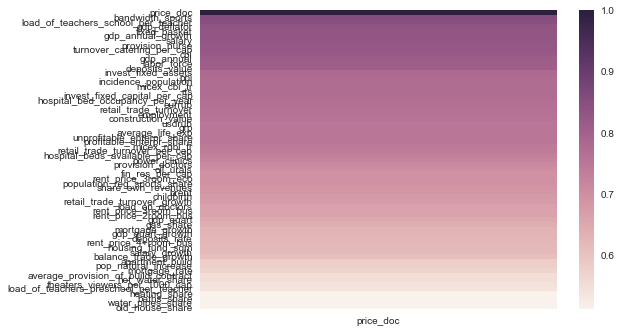

In [18]:
sns.heatmap(top_corr[b.price_doc > 0.5])

## Macro Groups Division

### Roadmap for Data Pre-processing (only numerical)
* Data to preprocess (총 16 지표)- 임의로 분류하여 설정(서로 관계가 있음을 가정) 
  * International_Index
  * Trade_Index
  * Domestic_Index
  * Resional_index
  * Labor_index
  * Income_Index
  * Household_Index
  * Retail_index
  * Investment_index
  * Distribution_Index
  * Demography_Index
  * Public_Infa_Index
  * National_service_Index
  * Rent_Price_Index
  * Leisure_Price_Index
  * Apartment_Index 

In [19]:
macro.columns

Index(['timestamp', 'oil_urals', 'gdp_quart', 'gdp_quart_growth', 'cpi', 'ppi',
       'gdp_deflator', 'balance_trade', 'balance_trade_growth', 'usdrub',
       ...
       'turnover_catering_per_cap', 'theaters_viewers_per_1000_cap',
       'seats_theather_rfmin_per_100000_cap', 'museum_visitis_per_100_cap',
       'bandwidth_sports', 'population_reg_sports_share',
       'students_reg_sports_share', 'apartment_build', 'apartment_fund_sqm',
       'yearmonth'],
      dtype='object', length=101)

In [13]:
International_Index = ['oil_urals', 'balance_trade', 'balance_trade_growth', 'usdrub','eurrub','brent']
Trade_Index = ['net_capital_export','rts','micex','micex_rgbi_tr', 'micex_cbi_tr']
Domestic_Index = ['gdp_quart', 'gdp_quart_growth','cpi', 'ppi','gdp_deflator','gdp_annual','gdp_annual_growth','average_provision_of_build_contract','average_provision_of_build_contract_moscow']
Regional_index = ['grp', 'grp_growth','fin_res_per_cap']
Labor_index = ['labor_force','unemployment','employment']
Income_Index = ['income_per_cap','real_dispos_income_per_cap_growth','salary','salary_growth','overdue_wages_per_cap']
Household_Index = ['deposits_value','deposits_growth','deposits_rate','mortgage_value', 'mortgage_growth', 'mortgage_rate','housing_fund_sqm','lodging_sqm_per_cap']
Retail_index = ['fixed_basket', 'retail_trade_turnover','retail_trade_turnover_per_cap', 'retail_trade_turnover_growth','provision_retail_space_sqm','provision_retail_space_modern_sqm']
Investment_index = ['invest_fixed_capital_per_cap', 'invest_fixed_assets','invest_fixed_assets_phys','construction_value']
Distribution_Index = ['profitable_enterpr_share', 'unprofitable_enterpr_share','share_own_revenues']
Demography_Index = ['marriages_per_1000_cap', 'divorce_rate','pop_natural_increase', 'pop_migration','pop_total_inc', 'childbirth', 'mortality','average_life_exp', 'infant_mortarity_per_1000_cap','perinatal_mort_per_1000_cap', 'incidence_population']
Public_Infa_Index = ['water_pipes_share', 'baths_share','sewerage_share', 'gas_share', 'hot_water_share','electric_stove_share', 'heating_share', 'old_house_share']
National_service_Index = ['turnover_catering_per_cap','load_of_teachers_preschool_per_teacher', 'load_of_teachers_school_per_teacher','students_state_oneshift', 'provision_doctors', 'provision_nurse','load_on_doctors', 'power_clinics', 'hospital_beds_available_per_cap','hospital_bed_occupancy_per_year']
Rent_Price_Index = ['rent_price_4+room_bus', 'rent_price_3room_bus', 'rent_price_2room_bus','rent_price_1room_bus', 'rent_price_3room_eco', 'rent_price_2room_eco','rent_price_1room_eco']
Leisure_Price_Index = ['theaters_viewers_per_1000_cap', 'seats_theather_rfmin_per_100000_cap',
       'museum_visitis_per_100_cap', 'bandwidth_sports',
       'population_reg_sports_share', 'students_reg_sports_share']
Apartment_Index = ['apartment_build', 'apartment_fund_sqm']
## 이상있음'child_on_acc_pre_school' 'modern_education_share'\n 'old_education_build_share'

In [21]:
#new_macro_features ## 2011년 8월~2015년 6월 월별('yearmonth')로 scaling 된 data
macro[International_Index].isnull().sum()

oil_urals                0
balance_trade           31
balance_trade_growth    90
usdrub                   3
eurrub                   3
brent                    3
dtype: int64

In [22]:
macro.iloc[577:2007].isnull().sum() ## 2011 년8월~ 2015년 6월

timestamp                                        0
oil_urals                                        0
gdp_quart                                        0
gdp_quart_growth                                 0
cpi                                              0
ppi                                              0
gdp_deflator                                     0
balance_trade                                    0
balance_trade_growth                             0
usdrub                                           0
eurrub                                           0
brent                                            0
net_capital_export                               0
gdp_annual                                       0
gdp_annual_growth                                0
average_provision_of_build_contract              0
average_provision_of_build_contract_moscow       0
rts                                              0
micex                                            0
micex_rgbi_tr                  

In [23]:

concated= pd.concat((new_macro_features[International_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## eurrub & price_doc 제일 높음

,oil_urals,balance_trade,balance_trade_growth,usdrub,eurrub,brent,price_doc
oil_urals,1.000000,0.350283,-0.529107,-0.966911,-0.919074,0.998462,-0.701517
brent,0.998462,0.365772,-0.511103,-0.965270,-0.917021,1.000000,-0.683890
balance_trade,0.350283,1.000000,0.252590,-0.296776,-0.253357,0.365772,0.065977
balance_trade_growth,-0.529107,0.252590,1.000000,0.593037,0.565129,-0.511103,0.610675
usdrub,-0.966911,-0.296776,0.593037,1.000000,0.975089,-0.965270,0.753241
eurrub,-0.919074,-0.253357,0.565129,0.975089,1.000000,-0.917021,0.765848
price_doc,-0.701517,0.065977,0.610675,0.753241,0.765848,-0.683890,1.000000


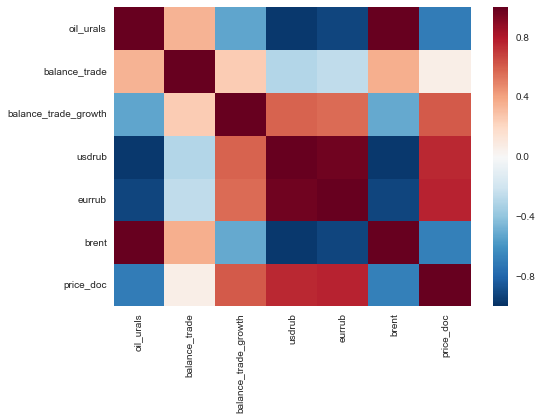

In [24]:
sns.heatmap(concated.corr())

In [40]:
concated= pd.concat((new_macro_features[Trade_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## micex_cbi_tr & price_doc 제일 높음

,net_capital_export,rts,micex,micex_rgbi_tr,micex_cbi_tr,price_doc
rts,0.439375,1.000000,-0.299972,0.866586,-0.721255,-0.773193
micex_rgbi_tr,0.205144,0.866586,-0.484290,1.000000,-0.474855,-0.746370
net_capital_export,1.000000,0.439375,-0.194245,0.205144,-0.488514,-0.323912
micex,-0.194245,-0.299972,1.000000,-0.484290,0.340654,0.391061
micex_cbi_tr,-0.488514,-0.721255,0.340654,-0.474855,1.000000,0.774683
price_doc,-0.323912,-0.773193,0.391061,-0.746370,0.774683,1.000000


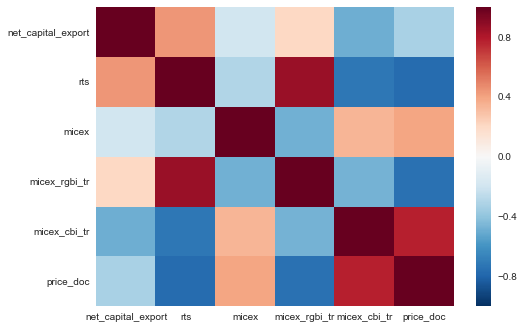

In [41]:
sns.heatmap(concated.corr())

In [42]:
concated= pd.concat((new_macro_features[Domestic_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## gdp_deflator & price_doc 제일 높음 but 값들이 다양한 cpi 선택 

,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,gdp_annual,gdp_annual_growth,average_provision_of_build_contract,average_provision_of_build_contract_moscow,price_doc
gdp_annual_growth,-0.765771,0.783665,-0.912430,-0.862254,-0.880574,-0.852912,1.000000,-0.710066,-0.079093,-0.830213
gdp_quart_growth,-0.538443,1.000000,-0.892139,-0.873575,-0.843486,-0.821075,0.783665,-0.566880,-0.056490,-0.629956
average_provision_of_build_contract_moscow,-0.091879,-0.056490,0.229821,0.172307,0.002261,-0.053124,-0.079093,-0.180982,1.000000,0.260112
average_provision_of_build_contract,0.745822,-0.566880,0.665397,0.639227,0.603443,0.595982,-0.710066,1.000000,-0.180982,0.549068
gdp_quart,1.000000,-0.538443,0.735460,0.682672,0.772340,0.762931,-0.765771,0.745822,-0.091879,0.649521
ppi,0.682672,-0.873575,0.958694,1.000000,0.880167,0.852813,-0.862254,0.639227,0.172307,0.775506
gdp_annual,0.762931,-0.821075,0.880879,0.852813,0.995229,1.000000,-0.852912,0.595982,-0.053124,0.812010
cpi,0.735460,-0.892139,1.000000,0.958694,0.916646,0.880879,-0.912430,0.665397,0.229821,0.822130
gdp_deflator,0.772340,-0.843486,0.916646,0.880167,1.000000,0.995229,-0.880574,0.603443,0.002261,0.833331
price_doc,0.649521,-0.629956,0.822130,0.775506,0.833331,0.812010,-0.830213,0.549068,0.260112,1.000000


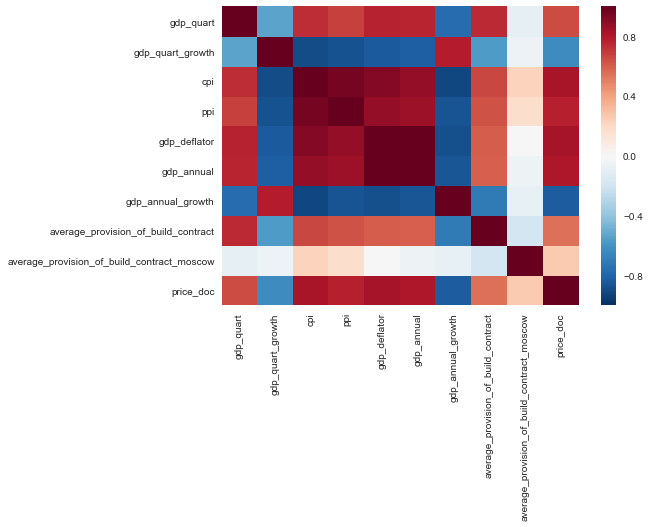

In [43]:
sns.heatmap(concated.corr())

In [44]:
concated= pd.concat((new_macro_features[Regional_index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## grp & price_doc 제일 높음 but Nan 값 있음


,grp,grp_growth,fin_res_per_cap,price_doc
fin_res_per_cap,-0.906651,0.164489,1.000000,-0.695364
grp_growth,-0.423818,1.000000,0.164489,-0.466856
grp,1.000000,-0.423818,-0.906651,0.751644
price_doc,0.751644,-0.466856,-0.695364,1.000000


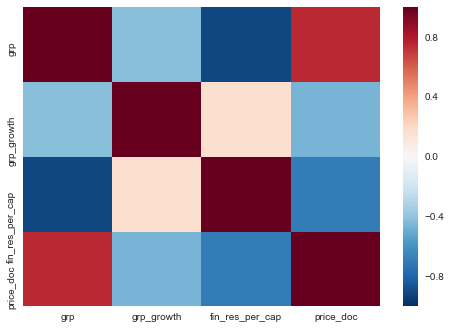

In [45]:
sns.heatmap(concated.corr())

In [11]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()
import datetime
import statsmodels.api as sm
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
macro = pd.read_csv('data/macro.csv')
macro['yearmonth'] = macro['timestamp'].apply(lambda x: x[:4]+x[5:7]) ## 년도&월 별로 정리

grouped_by_timestamp = macro.groupby('yearmonth')
#macro['yearmonth'] ## 2010 년1월~ 2016년 10월 ## 2483 개 데이터
## index 577 부터 201108 시작~ index 2006 = 2015년 6월 마지막
train['yearmonth'] = train['timestamp'].apply(lambda x: x[:4]+x[5:7])
#train['yearmonth'] ## 2011년 8월~ 2015년 6월 ## 21570 개 데이터
#train['yearmonth']
#grouped_by_timestamp.groups
# macro['yearmonth'].iloc[577:2007] ## macro 2011년 8월~ 2015년 6월 로 스케일링
#pd.DataFrame(macro['yearmonth'].iloc[577:2007]) ## 1430 데이터 
#macro.iloc[577:2007]# .isnull().any().sum() ## 42개의 feature들이 nan값 포함 
mean_by_time = train.groupby('yearmonth')['price_doc'].aggregate(np.mean) ## 47 rows
# macro.groupby('yearmonth')
group_by_time = macro.iloc[577:2007].groupby('yearmonth').aggregate(np.mean) ##47 rows 2011년8월~2015년 6월
new_macro_features = pd.concat([group_by_time, mean_by_time], axis = 1)

dfY_1 = sm.add_constant(new_macro_features['price_doc'])
dfX__1 = new_macro_features['grp'].loc[:'201412'] ## 41개 데이터
dfY__1 = new_macro_features['price_doc'].loc[:'201412']
dfX__1.values.reshape(41,1)
dfY__1.values.reshape(41,1)

dfY1 = sm.add_constant(dfY__1)
model1 = sm.OLS(dfX__1,dfY1)
result1 = model1.fit()
#a = new_macro_features['price_doc'][41:].reshape(6,1)
result1.predict(dfY_1)
new_macro_features['grp'][41:] = result1.predict(dfY_1)[41:]

new_macro_features['grp']## regression model 측정으로 Nan 값들 imputation 


yearmonth
201108     9948.772800
201109     9948.772800
201110     9948.772800
201111     9948.772800
201112     9948.772800
201201    10666.870500
201202    10666.870500
201203    10666.870500
201204    10666.870500
201205    10666.870500
201206    10666.870500
201207    10666.870500
201208    10666.870500
201209    10666.870500
201210    10666.870500
201211    10666.870500
201212    10666.870500
201301    11814.897400
201302    11814.897400
201303    11814.897400
201304    11814.897400
201305    11814.897400
201306    11814.897400
201307    11814.897400
201308    11814.897400
201309    11814.897400
201310    11814.897400
201311    11814.897400
201312    11814.897400
201401    12808.573400
201402    12808.573400
201403    12808.573400
201404    12808.573400
201405    12808.573400
201406    12808.573400
201407    12808.573400
201408    12808.573400
201409    12808.573400
201410    12808.573400
201411    12808.573400
201412    12808.573400
201501    13439.548952
201502    13259.130298
2

In [46]:
concated= pd.concat((new_macro_features[Labor_index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## labor_force & price_doc 제일 높음


,labor_force,unemployment,employment,price_doc
unemployment,0.485316,1.000000,0.389030,0.430841
employment,0.970030,0.389030,1.000000,0.761718
labor_force,1.000000,0.485316,0.970030,0.809198
price_doc,0.809198,0.430841,0.761718,1.000000


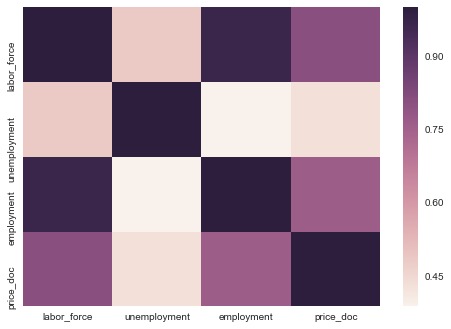

In [47]:
sns.heatmap(concated.corr())

In [48]:
concated= pd.concat((new_macro_features[Income_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## salary & price_doc 제일 높음


,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,overdue_wages_per_cap,price_doc
salary_growth,0.022426,0.569238,-0.487467,1.000000,0.529003,-0.620342
real_dispos_income_per_cap_growth,0.031718,1.000000,-0.338711,0.569238,0.737251,-0.433926
overdue_wages_per_cap,0.157336,0.737251,0.369852,0.529003,1.000000,0.083155
income_per_cap,1.000000,0.031718,0.162881,0.022426,0.157336,0.092857
salary,0.162881,-0.338711,1.000000,-0.487467,0.369852,0.827129
price_doc,0.092857,-0.433926,0.827129,-0.620342,0.083155,1.000000


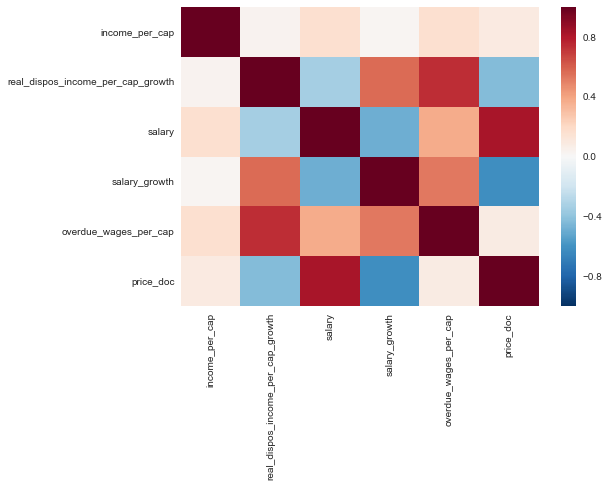

In [49]:
sns.heatmap(concated.corr())

In [50]:
concated= pd.concat((new_macro_features[Household_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## deposits_value & price_doc 제일 높음


,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,housing_fund_sqm,lodging_sqm_per_cap,price_doc
mortgage_growth,-0.866822,0.089723,-0.618333,-0.052986,1.000000,-0.869620,-0.804260,-0.609898,-0.631473
deposits_growth,-0.114630,1.000000,0.104470,0.253859,0.089723,-0.049898,-0.025610,0.052359,-0.063332
mortgage_value,0.283479,0.253859,0.187639,1.000000,-0.052986,-0.128856,0.227678,0.056888,0.135623
lodging_sqm_per_cap,0.394457,0.052359,0.220765,0.056888,-0.609898,0.548828,0.889661,1.000000,0.358208
mortgage_rate,0.699420,-0.049898,0.745969,-0.128856,-0.869620,1.000000,0.643049,0.548828,0.568581
housing_fund_sqm,0.754384,-0.025610,0.298130,0.227678,-0.804260,0.643049,1.000000,0.889661,0.620746
deposits_rate,0.610009,0.104470,1.000000,0.187639,-0.618333,0.745969,0.298130,0.220765,0.625113
deposits_value,1.000000,-0.114630,0.610009,0.283479,-0.866822,0.699420,0.754384,0.394457,0.806559
price_doc,0.806559,-0.063332,0.625113,0.135623,-0.631473,0.568581,0.620746,0.358208,1.000000


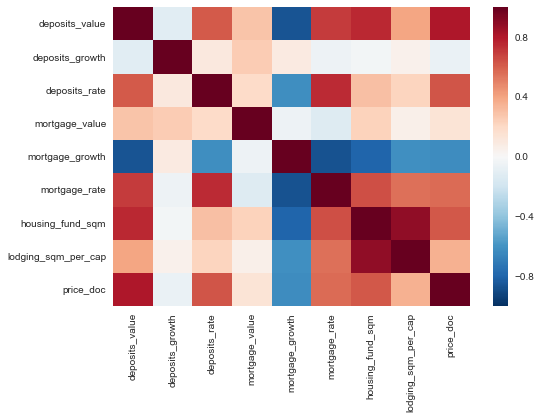

In [51]:
sns.heatmap(concated.corr())

In [52]:
concated= pd.concat((new_macro_features[Retail_index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## fixed_basket & price_doc 제일 높음
## provision_retail_space_modern_sqm -> Nan 값 1277 개 

,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,provision_retail_space_sqm,provision_retail_space_modern_sqm,price_doc
retail_trade_turnover_growth,-0.761805,-0.393659,-0.345394,1.000000,-1.000000,NaN,-0.675003
provision_retail_space_sqm,0.767149,1.000000,1.000000,-1.000000,1.000000,NaN,0.483804
retail_trade_turnover_per_cap,0.829897,0.997844,1.000000,-0.345394,1.000000,NaN,0.743390
retail_trade_turnover,0.850812,1.000000,0.997844,-0.393659,1.000000,NaN,0.764497
fixed_basket,1.000000,0.850812,0.829897,-0.761805,0.767149,NaN,0.830398
price_doc,0.830398,0.764497,0.743390,-0.675003,0.483804,NaN,1.000000
provision_retail_space_modern_sqm,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
concated= pd.concat((new_macro_features[Investment_index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## invest_fixed_assets & price_doc 제일 높음


,invest_fixed_capital_per_cap,invest_fixed_assets,invest_fixed_assets_phys,construction_value,price_doc
invest_fixed_assets_phys,-0.416076,-0.422156,1.000000,-0.611173,-0.386710
construction_value,0.963740,0.966379,-0.611173,1.000000,0.759633
invest_fixed_capital_per_cap,1.000000,0.999775,-0.416076,0.963740,0.772480
invest_fixed_assets,0.999775,1.000000,-0.422156,0.966379,0.780645
price_doc,0.772480,0.780645,-0.386710,0.759633,1.000000


In [14]:
concated= pd.concat((new_macro_features[Distribution_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## unprofitable_enterpr_share & price_doc 제일 높음 그러나 profitable_enterpr_share 값이 더 다양 그러나 Nan 값 2015년1월~6월 
#new_macro_features['profitable_enterpr_share']

,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,price_doc
profitable_enterpr_share,1.000000,-1.000000,-0.761083,-0.750456
share_own_revenues,-0.761083,0.761083,1.000000,0.688819
unprofitable_enterpr_share,-1.000000,1.000000,0.761083,0.750456
price_doc,-0.750456,0.750456,0.688819,1.000000


## 'profitable_enterpr_share' value의  Nan 값들 Imputation

In [37]:
new_macro_features['profitable_enterpr_share']

yearmonth
201108    0.708
201109    0.708
201110    0.708
201111    0.708
201112    0.708
201201    0.702
201202    0.702
201203    0.702
201204    0.702
201205    0.702
201206    0.702
201207    0.702
201208    0.702
201209    0.702
201210    0.702
201211    0.702
201212    0.702
201301    0.685
201302    0.685
201303    0.685
201304    0.685
201305    0.685
201306    0.685
201307    0.685
201308    0.685
201309    0.685
201310    0.685
201311    0.685
201312    0.685
201401    0.646
201402    0.646
201403    0.646
201404    0.646
201405    0.646
201406    0.646
201407    0.646
201408    0.646
201409    0.646
201410    0.646
201411    0.646
201412    0.646
201501      NaN
201502      NaN
201503      NaN
201504      NaN
201505      NaN
201506      NaN
Name: profitable_enterpr_share, dtype: float64

In [15]:
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
concated= pd.concat((new_macro_features[Distribution_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## profitable_enterpr_share & price_doc 제일 높음 but nan 값 있음
dfY_ = sm.add_constant(new_macro_features['price_doc'])
dfX__ = new_macro_features['profitable_enterpr_share'].loc[:'201412'] ## 41개 데이터
dfY__ = new_macro_features['price_doc'].loc[:'201412']
dfX__.values.reshape(41,1)
dfY__.values.reshape(41,1)

dfY = sm.add_constant(dfY__)
model = sm.OLS(dfX__,dfY)
result = model.fit()
#a = new_macro_features['price_doc'][41:].reshape(6,1)

new_macro_features['profitable_enterpr_share'][41:] = result.predict(dfY_)[41:]
# result.params
#y = 8.672338e-01*x + -2.769966e-08
new_macro_features['profitable_enterpr_share'] ## regression model 측정으로 Nan 값들 imputation 

yearmonth
201108    0.708000
201109    0.708000
201110    0.708000
201111    0.708000
201112    0.708000
201201    0.702000
201202    0.702000
201203    0.702000
201204    0.702000
201205    0.702000
201206    0.702000
201207    0.702000
201208    0.702000
201209    0.702000
201210    0.702000
201211    0.702000
201212    0.702000
201301    0.685000
201302    0.685000
201303    0.685000
201304    0.685000
201305    0.685000
201306    0.685000
201307    0.685000
201308    0.685000
201309    0.685000
201310    0.685000
201311    0.685000
201312    0.685000
201401    0.646000
201402    0.646000
201403    0.646000
201404    0.646000
201405    0.646000
201406    0.646000
201407    0.646000
201408    0.646000
201409    0.646000
201410    0.646000
201411    0.646000
201412    0.646000
201501    0.636262
201502    0.640551
201503    0.635516
201504    0.647909
201505    0.638982
201506    0.647958
Name: profitable_enterpr_share, dtype: float64

In [39]:
concated= pd.concat((new_macro_features[Demography_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## incidence_population & price_doc 제일 높음 but Nan 값 있음 -> average_life_exp 선택


,marriages_per_1000_cap,divorce_rate,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,price_doc
incidence_population,-0.234690,-0.043210,-0.757409,0.277051,0.183208,-0.615776,0.382502,-0.933256,0.464958,0.065873,1.000000,-0.774871
infant_mortarity_per_1000_cap,-0.957175,-0.360130,0.085392,0.960958,0.929775,0.401445,0.419686,-0.600844,1.000000,0.881308,0.464958,-0.338643
pop_migration,-0.932365,-0.188991,0.339813,1.000000,0.994780,0.533282,0.186644,-0.374776,0.960958,0.867698,0.277051,-0.216041
pop_total_inc,-0.917543,-0.155381,0.434014,0.994780,1.000000,0.597001,0.121136,-0.278259,0.929775,0.864830,0.183208,-0.147605
divorce_rate,0.530606,1.000000,0.236442,-0.188991,-0.155381,-0.393242,-0.935504,0.394735,-0.360130,-0.620076,-0.043210,-0.088422
perinatal_mort_per_1000_cap,-0.980371,-0.620076,0.310168,0.867698,0.864830,0.741308,0.525183,-0.324912,0.881308,1.000000,0.065873,0.005272
marriages_per_1000_cap,1.000000,0.530606,-0.225080,-0.932365,-0.917543,-0.621394,-0.497430,0.450201,-0.957175,-0.980371,-0.234690,0.138261
mortality,-0.497430,-0.935504,-0.341526,0.186644,0.121136,0.315955,1.000000,-0.352249,0.419686,0.525183,0.382502,0.144556
pop_natural_increase,-0.225080,0.236442,1.000000,0.339813,0.434014,0.783820,-0.341526,0.761760,0.085392,0.310168,-0.757409,0.577774
childbirth,-0.621394,-0.393242,0.783820,0.533282,0.597001,1.000000,0.315955,0.536239,0.401445,0.741308,-0.615776,0.678757


In [40]:
macro['yearmonth'] = macro['timestamp'].apply(lambda x: x[:4]+x[5:7]) ## 년도&월 별로 정리

grouped_by_timestamp = macro.groupby('yearmonth')
#macro['yearmonth'] ## 2010 년1월~ 2016년 10월 ## 2483 개 데이터
## index 577 부터 201108 시작~ index 2006 = 2015년 6월 마지막
train['yearmonth'] = train['timestamp'].apply(lambda x: x[:4]+x[5:7])
#train['yearmonth'] ## 2011년 8월~ 2015년 6월 ## 21570 개 데이터
#train['yearmonth']
#grouped_by_timestamp.groups
# macro['yearmonth'].iloc[577:2007] ## macro 2011년 8월~ 2015년 6월 로 스케일링
#pd.DataFrame(macro['yearmonth'].iloc[577:2007]) ## 1430 데이터 
#macro.iloc[577:2007]# .isnull().any().sum() ## 42개의 feature들이 nan값 포함 
mean_by_time = train.groupby('yearmonth')['price_doc'].aggregate(np.mean) ## 47 rows
# macro.groupby('yearmonth')
group_by_time = macro.iloc[577:2007].groupby('yearmonth').aggregate(np.mean) ##47 rows 2011년8월~2015년 6월
new_macro_features = pd.concat([group_by_time, mean_by_time], axis = 1)
new_macro_features ['gas_share']## macro 2011년 8월~ 2015년 6월 로 스케일링된 feature들의 월평균값 
concated= pd.concat((new_macro_features[Public_Infa_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## gas_share & price_doc 제일 높음,Nan 값 있음


,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,price_doc
gas_share,0.239732,0.239732,0.168811,1.000000,0.327183,-0.703455,0.239732,-0.239732,-0.640369
hot_water_share,0.995157,0.995157,0.986465,0.327183,1.000000,0.403971,0.995157,-0.995157,-0.548778
heating_share,1.000000,1.000000,0.995791,0.239732,0.995157,0.473593,1.000000,-1.000000,-0.512205
water_pipes_share,1.000000,1.000000,0.995791,0.239732,0.995157,0.473593,1.000000,-1.000000,-0.512205
baths_share,1.000000,1.000000,0.995791,0.239732,0.995157,0.473593,1.000000,-1.000000,-0.512205
sewerage_share,0.995791,0.995791,1.000000,0.168811,0.986465,0.546933,0.995791,-0.995791,-0.456730
electric_stove_share,0.473593,0.473593,0.546933,-0.703455,0.403971,1.000000,0.473593,-0.473593,0.274491
old_house_share,-1.000000,-1.000000,-0.995791,-0.239732,-0.995157,-0.473593,-1.000000,1.000000,0.512205
price_doc,-0.512205,-0.512205,-0.456730,-0.640369,-0.548778,0.274491,-0.512205,0.512205,1.000000


In [16]:
##'gas_share' value의  Nan 값들 Imputation
dfY_2 = sm.add_constant(new_macro_features['price_doc'])
dfX__2 = new_macro_features['gas_share'].loc[:'201412'] ## 41개 데이터
dfY__2 = new_macro_features['price_doc'].loc[:'201412']
dfX__2.values.reshape(41,1)
dfY__2.values.reshape(41,1)

dfY2 = sm.add_constant(dfY__2)

model2 = sm.OLS(dfX__2,dfY2)
result2 = model2.fit()
#a = new_macro_features['price_doc'][41:].reshape(6,1)
new_macro_features ['gas_share'][41:] = result2.predict(dfY_2)[41:]
new_macro_features['gas_share']

yearmonth
201108    43.900000
201109    43.900000
201110    43.900000
201111    43.900000
201112    43.900000
201201    44.100000
201202    44.100000
201203    44.100000
201204    44.100000
201205    44.100000
201206    44.100000
201207    44.100000
201208    44.100000
201209    44.100000
201210    44.100000
201211    44.100000
201212    44.100000
201301    43.600000
201302    43.600000
201303    43.600000
201304    43.600000
201305    43.600000
201306    43.600000
201307    43.600000
201308    43.600000
201309    43.600000
201310    43.600000
201311    43.600000
201312    43.600000
201401    43.300000
201402    43.300000
201403    43.300000
201404    43.300000
201405    43.300000
201406    43.300000
201407    43.300000
201408    43.300000
201409    43.300000
201410    43.300000
201411    43.300000
201412    43.300000
201501    43.186596
201502    43.234950
201503    43.178187
201504    43.317913
201505    43.217267
201506    43.318466
Name: gas_share, dtype: float64

In [43]:
concated= pd.concat((new_macro_features[National_service_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## load_of_teachers_school_per_teacher & price_doc 제일 높음
#'child_on_acc_pre_school' 'modern_education_share'\n 'old_education_build_share' - 이상있음

,turnover_catering_per_cap,load_of_teachers_preschool_per_teacher,load_of_teachers_school_per_teacher,students_state_oneshift,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,price_doc
provision_nurse,-0.857953,-0.743831,-0.991348,0.359102,0.883813,1.000000,0.855227,0.796268,0.770828,0.836466,-0.826526
hospital_bed_occupancy_per_year,-0.964912,-0.809507,-0.877843,0.535426,0.920467,0.836466,0.391199,0.875208,0.986666,1.000000,-0.768301
hospital_beds_available_per_cap,-0.918256,-0.579932,-0.807999,0.594459,0.930189,0.770828,0.374710,0.791411,1.000000,0.986666,-0.734212
power_clinics,-0.967684,-0.998362,-0.864708,0.144847,0.674580,0.796268,0.195072,1.000000,0.791411,0.875208,-0.724835
provision_doctors,-0.801161,-0.339491,-0.876750,0.819258,1.000000,0.883813,0.687255,0.674580,0.930189,0.920467,-0.711045
load_on_doctors,-0.523166,0.606743,-0.841323,0.376076,0.687255,0.855227,1.000000,0.195072,0.374710,0.391199,-0.663787
students_state_oneshift,-0.168027,0.999337,-0.256359,1.000000,0.819258,0.359102,0.376076,0.144847,0.594459,0.535426,-0.185014
load_of_teachers_preschool_per_teacher,0.941344,1.000000,0.894389,0.999337,-0.339491,-0.743831,0.606743,-0.998362,-0.579932,-0.809507,0.542303
turnover_catering_per_cap,1.000000,0.941344,0.888419,-0.168027,-0.801161,-0.857953,-0.523166,-0.967684,-0.918256,-0.964912,0.824754
load_of_teachers_school_per_teacher,0.888419,0.894389,1.000000,-0.256359,-0.876750,-0.991348,-0.841323,-0.864708,-0.807999,-0.877843,0.850210


In [44]:
concated= pd.concat((new_macro_features[Rent_Price_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## rent_price_3room_eco & price_doc 제일 높음

,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,price_doc
rent_price_1room_eco,0.068548,0.154869,0.224205,0.309348,0.260537,0.060496,1.000000,0.220810
rent_price_2room_eco,0.260320,0.163843,0.306671,0.241698,0.241130,1.000000,0.060496,0.233592
rent_price_1room_bus,0.328811,0.243116,0.696861,1.000000,0.560395,0.241698,0.309348,0.328758
rent_price_4+room_bus,1.000000,0.469170,0.549154,0.328811,0.512961,0.260320,0.068548,0.622718
rent_price_2room_bus,0.549154,0.580875,1.000000,0.696861,0.869559,0.306671,0.224205,0.661689
rent_price_3room_bus,0.469170,1.000000,0.580875,0.243116,0.628373,0.163843,0.154869,0.662317
rent_price_3room_eco,0.512961,0.628373,0.869559,0.560395,1.000000,0.241130,0.260537,0.694443
price_doc,0.622718,0.662317,0.661689,0.328758,0.694443,0.233592,0.220810,1.000000


In [45]:
concated= pd.concat((new_macro_features[Leisure_Price_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## bandwidth_sports & price_doc 제일 높음

,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,price_doc
seats_theather_rfmin_per_100000_cap,-0.883296,1.000000,-0.989176,0.284755,-0.594604,-0.994227,0.269798
students_reg_sports_share,0.928499,-0.994227,0.999210,1.000000,0.987804,1.000000,0.465839
museum_visitis_per_100_cap,0.942525,-0.989176,1.000000,0.999218,0.980834,0.999210,0.477436
theaters_viewers_per_1000_cap,1.000000,-0.883296,0.942525,0.928581,0.859357,0.928499,0.544305
population_reg_sports_share,0.859357,-0.594604,0.980834,0.943505,1.000000,0.987804,0.693796
bandwidth_sports,0.928581,0.284755,0.999218,1.000000,0.943505,1.000000,0.855994
price_doc,0.544305,0.269798,0.477436,0.855994,0.693796,0.465839,1.000000


In [46]:
concated= pd.concat((new_macro_features[Apartment_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## apartment_build & price_doc 제일 높음 -> Nan 값 있음 , 영향이 별로 없어서 삭제

,apartment_build,apartment_fund_sqm,price_doc
apartment_fund_sqm,-0.314926,1.000000,0.227223
apartment_build,1.000000,-0.314926,0.582052
price_doc,0.582052,0.227223,1.000000


## 각 division 에서 Target Value와 높은 상관계수 높은 11개 항목
### 각 feature들간의 상관계수 확인
* eurrub
* micex_cbi_tr
* cpi
* grp
* labor_force
* salary
* deposits_value
* fixed_basket
* invest_fixed_assets
* profitable_enterpr_share
* average_life_exp
* gas_share
* load_of_teachers_school_per_teacher
* rent_price_3room_eco
* bandwidth_sports
* apartment_build ## 영향이 별로 없어 삭제

In [18]:
selected = ['eurrub','micex_cbi_tr','cpi','grp','labor_force','salary','deposits_value','fixed_basket','invest_fixed_assets','profitable_enterpr_share','average_life_exp','gas_share','load_of_teachers_school_per_teacher','rent_price_3room_eco','bandwidth_sports']

In [19]:
concated= pd.concat((new_macro_features[selected],new_macro_features['price_doc']),axis =1)
concated.corr()

,eurrub,micex_cbi_tr,cpi,grp,labor_force,salary,deposits_value,fixed_basket,invest_fixed_assets,profitable_enterpr_share,average_life_exp,gas_share,load_of_teachers_school_per_teacher,rent_price_3room_eco,bandwidth_sports,price_doc
eurrub,1.000000,0.673857,0.841795,0.735437,0.677979,0.742017,0.776076,0.842797,0.602456,-0.780976,0.696341,-0.722794,0.802481,0.672999,0.842955,0.765848
micex_cbi_tr,0.673857,1.000000,0.927899,0.966089,0.923625,0.975744,0.980047,0.948923,0.933965,-0.913750,0.950398,-0.908224,0.826147,0.794950,0.933061,0.774683
cpi,0.841795,0.927899,1.000000,0.900202,0.848689,0.917744,0.950174,0.992803,0.829280,-0.890375,0.860337,-0.841424,0.902450,0.776014,0.963423,0.822130
grp,0.735437,0.966089,0.900202,1.000000,0.967747,0.997132,0.968361,0.931276,0.950872,-0.966143,0.969141,-0.938869,0.863064,0.819099,0.954794,0.824990
labor_force,0.677979,0.923625,0.848689,0.967747,1.000000,0.965396,0.923171,0.871322,0.942809,-0.965093,0.913417,-0.873140,0.893680,0.817042,0.919371,0.809198
salary,0.742017,0.975744,0.917744,0.997132,0.965396,1.000000,0.974525,0.944890,0.948185,-0.964833,0.970730,-0.938259,0.872392,0.812687,0.964815,0.827129
deposits_value,0.776076,0.980047,0.950174,0.968361,0.923171,0.974525,1.000000,0.972124,0.928104,-0.923766,0.938673,-0.902854,0.855082,0.830762,0.947581,0.806559
fixed_basket,0.842797,0.948923,0.992803,0.931276,0.871322,0.944890,0.972124,1.000000,0.860952,-0.909707,0.897844,-0.877738,0.892130,0.784746,0.972624,0.830398
invest_fixed_assets,0.602456,0.933965,0.829280,0.950872,0.942809,0.948185,0.928104,0.860952,1.000000,-0.863729,0.876667,-0.801781,0.823836,0.775755,0.863422,0.780645
profitable_enterpr_share,-0.780976,-0.913750,-0.890375,-0.966143,-0.965093,-0.964833,-0.923766,-0.909707,-0.863729,1.000000,-0.942896,0.940302,-0.899689,-0.812648,-0.965547,-0.824032


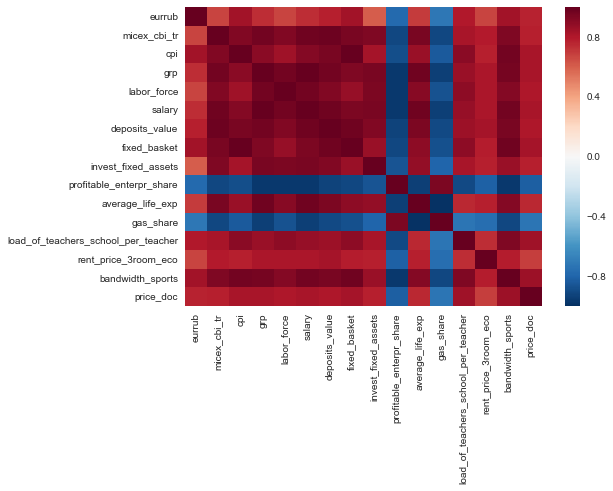

In [20]:
sns.heatmap(concated.corr())  ## 대부분 featrue 들끼리 높은 상관관계를 가짐 

## 레버리지 계산

In [36]:
## concated= pd.concat((new_macro_features[selected],new_macro_features['price_doc']),axis =1)
import statsmodels.api as sm

X30 = new_macro_features[selected]
Y3 = new_macro_features['price_doc']
X3= sm.add_constant(X30)

X3.values.reshape(47,16)## 47*16
Y3.values.reshape(47,1) ## 47,

model3 = sm.OLS(Y3, X3) ## Nan 값이 없어야함 
result3 = model3.fit()

print(result3.summary())



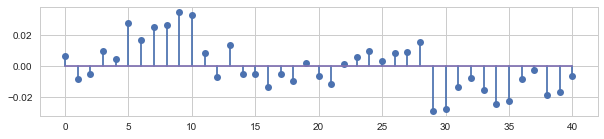

In [31]:
result4 = result3.resid
plt.figure(figsize=(10, 2))
plt.stem(result.resid)
plt.show()

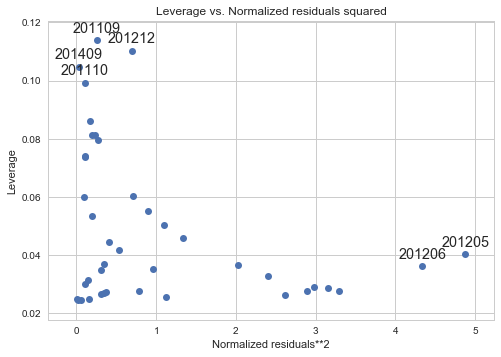

In [32]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

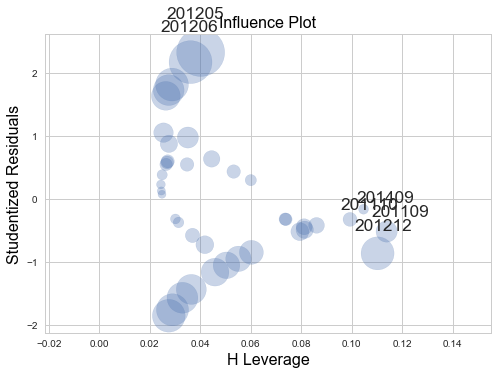

In [33]:
sm.graphics.influence_plot(result, plot_alpha=0.3)
plt.show()